In [1]:
# load file
from google.colab import files
uploaded = files.upload()

Saving train.parquet to train.parquet


# Import required libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset

In [5]:
data = pd.read_parquet('/content/train.parquet')

In [21]:
data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


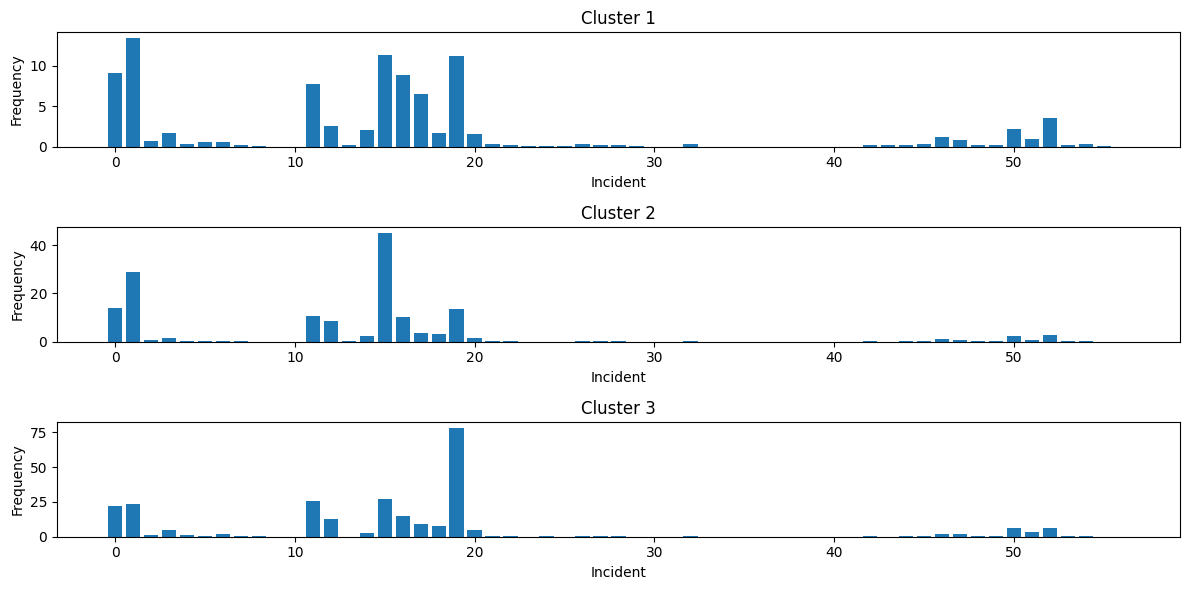

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Preprocess data
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Encode 'Incident' column using label encoding
label_encoder = LabelEncoder()
data['Incident'] = label_encoder.fit_transform(data['Incident'])

# Calculate time intervals in months
data['Month'] = (data['Date'] - data['Date'].min()).dt.days // 30

# Pivot table to identify prescription patterns
pivot_table = pd.pivot_table(data, index='Patient-Uid', columns='Incident', values='Month', aggfunc='count', fill_value=0)

# Apply K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(pivot_table)

# Visualize the prescription patterns
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster + 1)
    cluster_patients = pivot_table.index[clusters == cluster]
    cluster_data = pivot_table[pivot_table.index.isin(cluster_patients)]

    # Calculate and plot prescription patterns for each cluster
    prescription_pattern = cluster_data.mean()
    plt.bar(prescription_pattern.index, prescription_pattern.values)
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('Incident')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


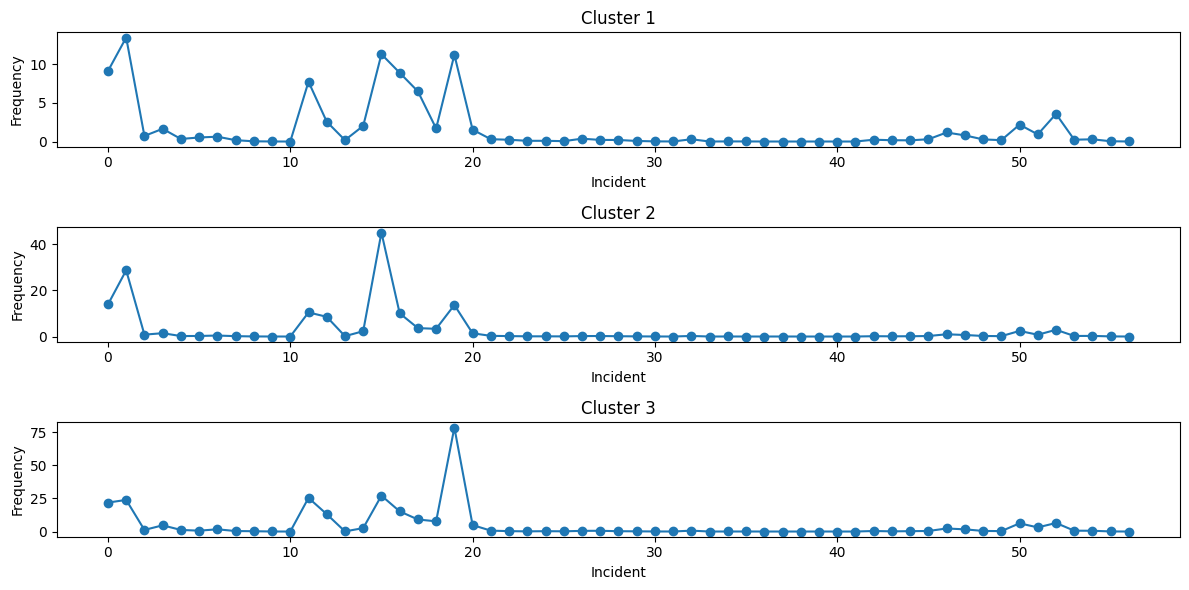

In [28]:
# Preprocess data
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Encode 'Incident' column using label encoding
label_encoder = LabelEncoder()
data['Incident'] = label_encoder.fit_transform(data['Incident'])

# Calculate time intervals in months
data['Month'] = (data['Date'] - data['Date'].min()).dt.days // 30

# Pivot table to identify prescription patterns
pivot_table = pd.pivot_table(data, index='Patient-Uid', columns='Incident', values='Month', aggfunc='count', fill_value=0)

# Apply K-Means clustering
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(pivot_table)

# Create a line plot for prescription patterns
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    cluster_patients = pivot_table.index[clusters == cluster]
    cluster_data = pivot_table[pivot_table.index.isin(cluster_patients)]

    # Calculate and plot prescription patterns for each cluster
    prescription_pattern = cluster_data.mean()
    x = prescription_pattern.index
    y = prescription_pattern.values

    plt.subplot(n_clusters, 1, cluster + 1)
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('Incident')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
